In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression  # Mudança aqui
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler

In [19]:
# Carregando o dataset
df = pd.read_csv("datasets/winequality-merged.csv")
print(df.head())

# Converter a coluna categórica 'color' para valores numéricos
df['color'] = df['color'].map({'white': 0, 'red': 1})

# Explorando os dados
print(df.describe())
print(df.isnull().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  

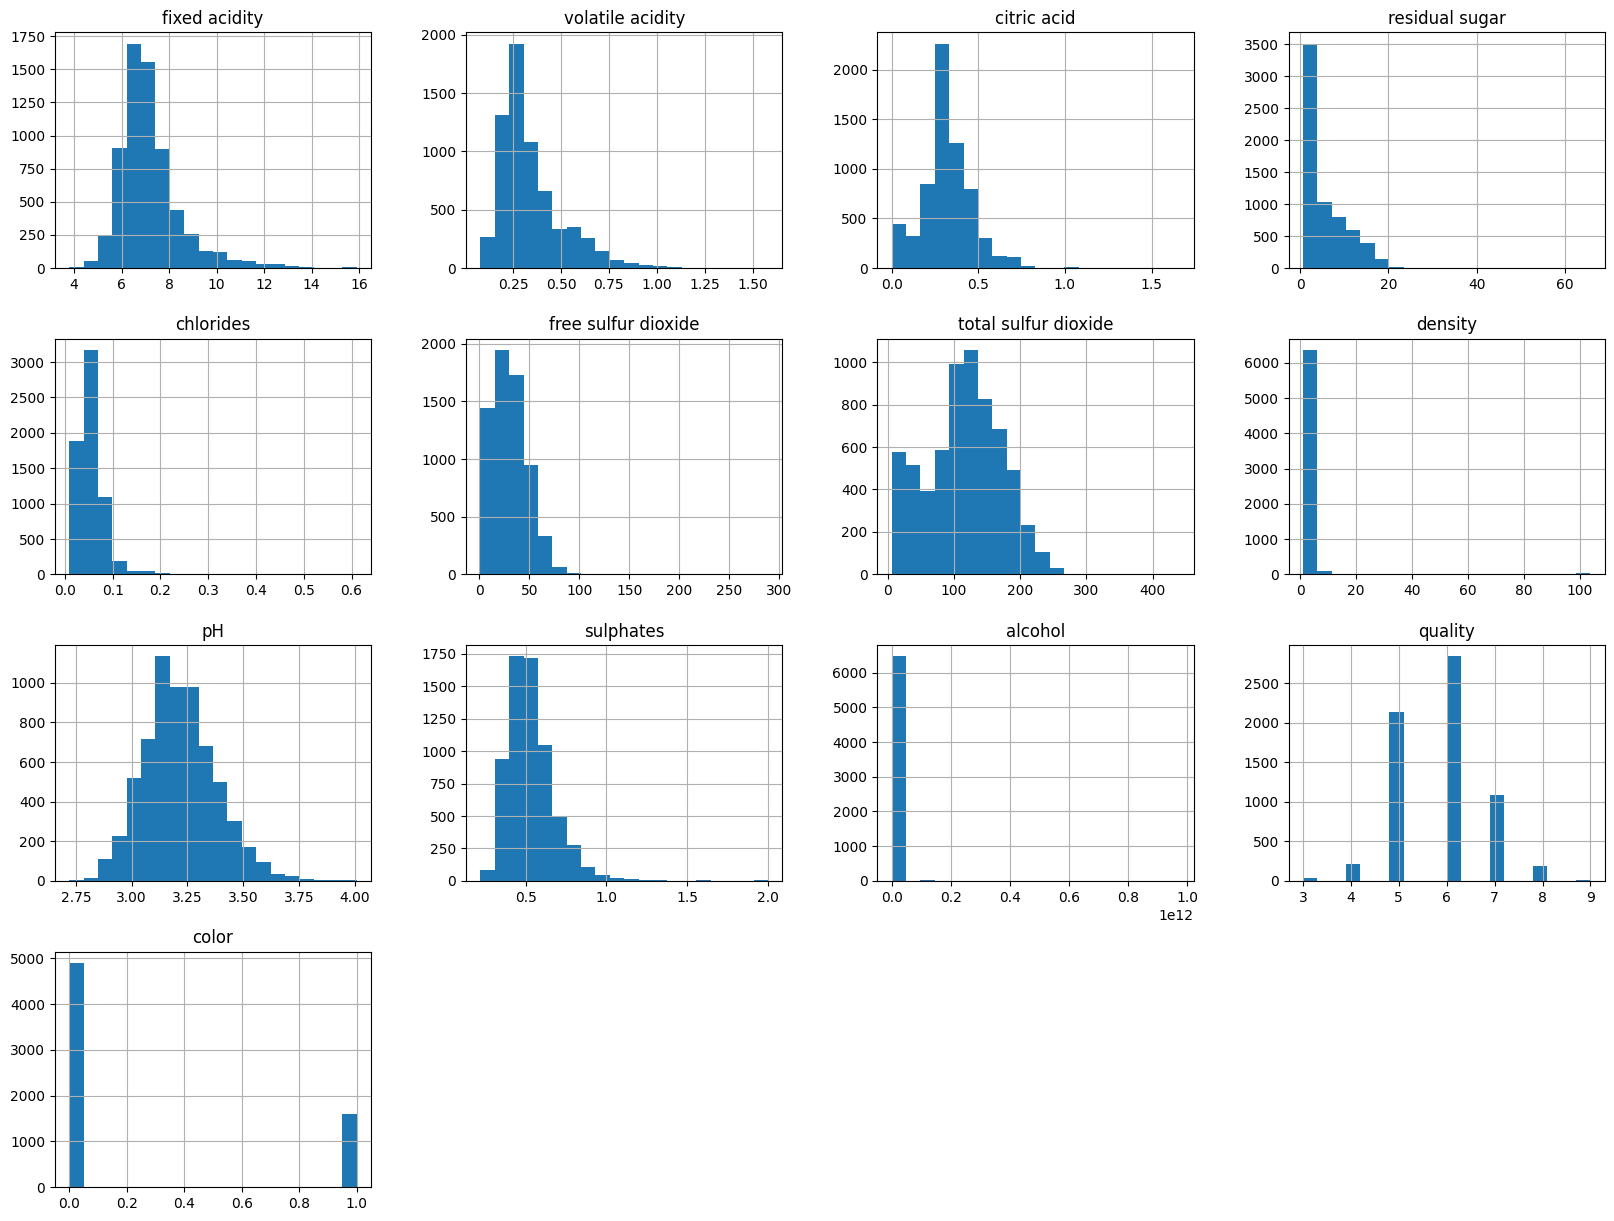

In [20]:
df.hist(figsize=(20,15), bins=20)
plt.show()

In [21]:
# Separando features e alvo
X = df.drop("quality", axis=1)
# Convertendo 'quality' em binário: 1 para >= 6 (bom), 0 para < 6 (ruim)
y = (df["quality"] >= 6).astype(int)

In [ ]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando e treinando o modelo com pesos balanceados
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Balanceia classes
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Previsões são diretamente 0 ou 1

In [ ]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print("Matriz de Confusão:")
print(cm)

Acurácia da classificação: 0.66
Matriz de Confusão:
[[306 162]
 [278 554]]


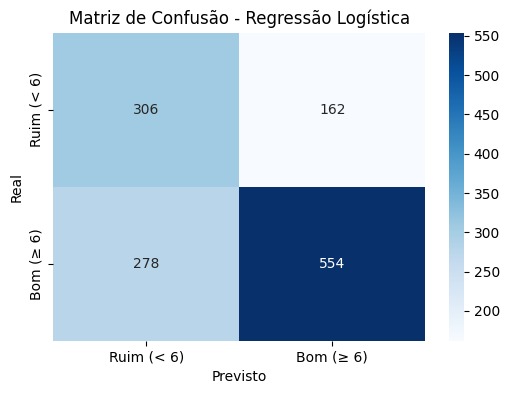

In [ ]:
# 1. Visualização da Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Ruim (< 6)", "Bom (≥ 6)"], 
            yticklabels=["Ruim (< 6)", "Bom (≥ 6)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

In [ ]:
# 2. Curva ROC e AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.show()